In [23]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [24]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [25]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'

In [26]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [27]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [30]:
# useful for getting number of output classes
folders = glob('cell_images/Train/*')

In [31]:
folders

['cell_images/Train/Parasitized', 'cell_images/Train/Uninfected']

In [32]:
# Flatten the output of vgg19 layers
x = Flatten()(vgg19.output)

In [33]:
# Output layer
prediction =Dense(len(folders), activation='softmax')(x)
model= Model(inputs=vgg19.input, outputs=prediction)

In [34]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [35]:
# from tensorflow.keras.layers import MaxPooling2D

In [43]:

# tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy', # There are 2 nodes in the output
    optimizer='adam',
    metrics=['accuracy']
)

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Using Image data augmentation 
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [45]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('cell_images/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 27400 images belonging to 2 classes.


In [46]:
test_set = test_datagen.flow_from_directory('cell_images/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 158 images belonging to 2 classes.


In [47]:
r =model.fit(
    training_set,
    validation_data=test_set,
    epochs=2,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/2
857/857 [==============================] - 2896s 3s/step - loss: 0.3724 - accuracy: 0.8380 - val_loss: 0.6184 - val_accuracy: 0.7848
Epoch 2/2
857/857 [==============================] - 2907s 3s/step - loss: 0.2895 - accuracy: 0.8864 - val_loss: 0.4234 - val_accuracy: 0.8481


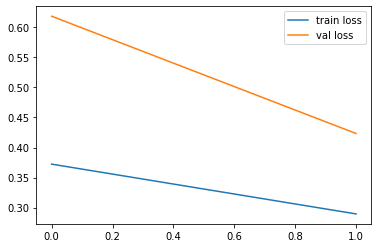

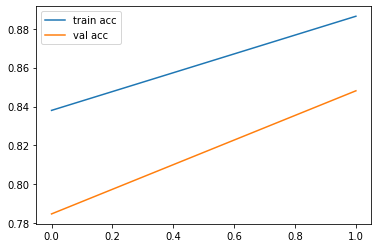

<Figure size 432x288 with 0 Axes>

In [48]:

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss ')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [70]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_vgg19')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_vgg19/assets


In [71]:
cd

/home/ajay


In [51]:
y_pred=model.predict(test_set)
y_pred

array([[4.46535051e-01, 5.53464949e-01],
       [3.65341604e-02, 9.63465810e-01],
       [8.66647184e-01, 1.33352831e-01],
       [8.22816849e-01, 1.77183121e-01],
       [7.78258964e-02, 9.22174037e-01],
       [6.23601377e-01, 3.76398623e-01],
       [2.35173583e-01, 7.64826357e-01],
       [7.90756047e-02, 9.20924366e-01],
       [5.25812745e-01, 4.74187285e-01],
       [6.85646832e-02, 9.31435347e-01],
       [9.87090528e-01, 1.29094515e-02],
       [9.42019671e-02, 9.05798018e-01],
       [9.34209883e-01, 6.57900646e-02],
       [9.87894356e-01, 1.21056428e-02],
       [8.86597335e-01, 1.13402687e-01],
       [1.00000000e+00, 3.36768946e-09],
       [9.92260277e-01, 7.73970783e-03],
       [1.75194725e-01, 8.24805319e-01],
       [5.98143220e-01, 4.01856810e-01],
       [9.75264192e-01, 2.47357693e-02],
       [5.48512936e-01, 4.51487064e-01],
       [2.68096060e-01, 7.31903970e-01],
       [2.19637409e-01, 7.80362546e-01],
       [1.35742873e-01, 8.64257157e-01],
       [9.989713

In [52]:
import numpy as np
y_pred =np.argmax(y_pred,axis=1)

In [53]:
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1])

In [54]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [55]:
model = load_model('model_vgg19.h5')

In [57]:
img = image.load_img('cell_images/Test/Uninfected/C13NThinF_IMG_20150614_131318_cell_179.png',target_size=(224,224))

In [60]:
x=image.img_to_array(img)
x.shape

(224, 224, 3)

In [62]:
x=x/255

In [63]:
x=np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [64]:
model.predict(img_data)

array([[3.3754823e-21, 1.0000000e+00]], dtype=float32)

In [65]:
a=np.argmax(model.predict(img_data),axis=1)

In [68]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
